In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import IceCubeAnalysis_mojave as IceCubeAnalysis
from multiprocessing import Pool
from scipy.optimize import curve_fit
import scipy.interpolate
import scipy.integrate


In [5]:
energy_plot = np.load("./plot_data/energy_distribution.npz",
                             allow_pickle=True)

energy_dist_x = energy_plot["energy_dist_x"]
energy_dist_y = energy_plot["energy_dist_y"]


energy_plot = np.load("./plot_data/energy_likelihood_plot.npz",
                             allow_pickle=True)

energy_likelihood_x = energy_plot["energy_likelihood_x"]
energy_likelihood_y = energy_plot["energy_likelihood_y"]


f_like = scipy.interpolate.interp1d(energy_likelihood_x[energy_likelihood_x>=2.3],
                                    energy_likelihood_y[energy_likelihood_x>=2.3],
                                    kind = "linear",
                                    bounds_error = False,
                                    fill_value = 0.08732436736936261)



In [6]:
print(energy_likelihood_y[energy_likelihood_x>2.3][1])

0.08732436736936261


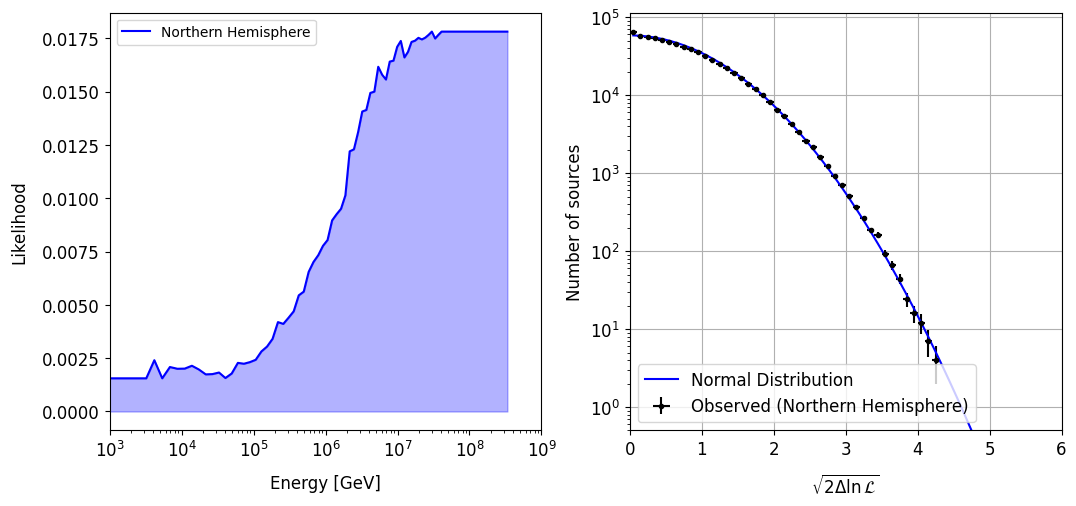

In [9]:
def log_gaus(x, a, b):
    return a + b * x * x 

bins_to_fit = energy_dist_y != 0
bins_to_fit = bins_to_fit >0.05

popt, pcov = curve_fit(log_gaus,
                       energy_dist_x[bins_to_fit],
                       np.log(energy_dist_y[bins_to_fit]))


index_of_best = np.argsort(-1 * energy_dist_x)
"""
for i in index_of_best[:20]:
    print("%.2f & %.2f & %.2f \\\\ \hline" % (energy_dist_x,
                                              every_pt[:, :, 0].flatten()[i],
                                              every_pt[:, :, 1].flatten()[i]))

"""
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[1].set_yscale('log')
ax[1].errorbar(energy_dist_x, energy_dist_y, xerr=3/len(energy_dist_y), yerr=np.sqrt(energy_dist_y),
            color="black", label="Observed (Northern Hemisphere)", fmt='.')
ax[1].plot(energy_dist_x, np.exp(log_gaus(energy_dist_x, *popt)),
        color='blue', label="Normal Distribution")
ax[1].set_ylim(0.5, 2.0 * energy_dist_y[1])
ax[1].set_xlim(0.0, 6)
ax[1].set_xlabel("$\sqrt{2 \Delta \ln \mathcal{L}}$", labelpad=10, fontsize = 12)
ax[1].set_ylabel("Number of sources", fontsize = 12)
ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].yaxis.set_tick_params(labelsize=12)

ax[1].grid()
ax[1].legend(fontsize = 12)
plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)    



ax[0].plot(energy_likelihood_x**10, f_like(energy_likelihood_x)/np.sum(f_like(energy_likelihood_x)), color="blue", label = "Northern Hemisphere")
ax[0].fill_between(energy_likelihood_x**10, f_like(energy_likelihood_x)/np.sum(f_like(energy_likelihood_x)), color='blue', alpha=0.3)
ax[0].set_xscale("log")
ax[0].set_xlim(10**3,10**9)
ax[0].set_xlabel("Energy [GeV]", labelpad=10, fontsize = 12)
ax[0].set_ylabel("Likelihood", labelpad=10, fontsize = 12)
ax[0].xaxis.set_tick_params(labelsize=12)
ax[0].yaxis.set_tick_params(labelsize=12)

ax[0].legend()


plt.savefig("./plots/double_likelihood.pdf", bbox_inches='tight')


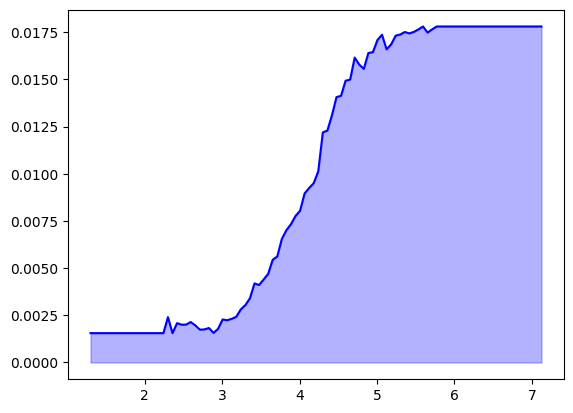

In [72]:
plt.plot(energy_likelihood_x, f_like(energy_likelihood_x)/np.sum(f_like(energy_likelihood_x)), color="blue")
plt.fill_between(energy_likelihood_x, f_like(energy_likelihood_x)/np.sum(f_like(energy_likelihood_x)), color='blue', alpha=0.3)
